In [ ]:
#importing Libraries
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
!pip install seaborn

In [3]:
import seaborn as sns

In [4]:
df_DA_US =df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset= ['salary_year_avg'])

C:\Users\Joy\AppData\Local\Temp\ipykernel_25156\3472200892.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_DA_skills, x ='median', y = df_DA_skills.index, ax =ax[1], palette= 'light:b_r')


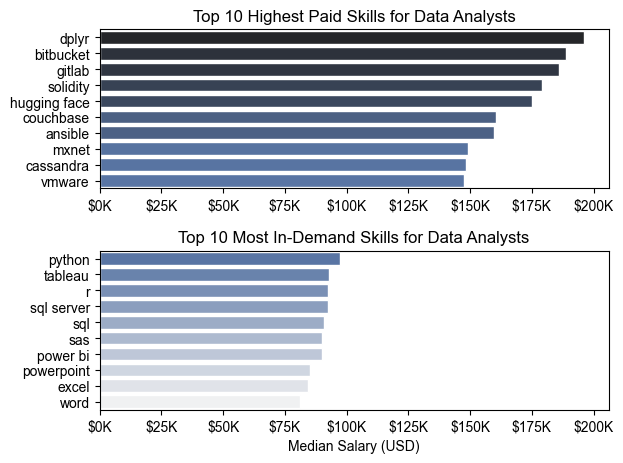

In [20]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending= False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count',ascending= False).head(10).sort_values(by='median',ascending= False).head(10)

fig , ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data= df_DA_top_pay, x ='median', y = df_DA_top_pay.index, ax =ax[0], hue ='median', palette= 'dark:b_r')

#df_DA_top_pay[::-1].plot(kind = 'barh', y = 'median' , ax = ax[0]) -- For  inverting axis



ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data= df_DA_skills, x ='median', y = df_DA_skills.index, ax =ax[1], palette= 'light:b_r')



ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

